In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2024-06-27 12:58:37.222975: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
f"Conjunto de entrenamiento: {x_train.shape} y {y_train.shape}" \
f" y validación: {x_test.shape} y {y_test.shape}"

'Conjunto de entrenamiento: (60000, 28, 28) y (60000,) y validación: (10000, 28, 28) y (10000,)'

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # shape -> (None, 784)
  tf.keras.layers.Dense(units=128, activation='relu'), # shape -> (batch_size, ..., 128)
  tf.keras.layers.Dropout(rate=0.2), # no changes in shape
  tf.keras.layers.Dense(units=10, activation='softmax'), # shape -> (batch_size, ..., 10)
])

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

/Users/asaucedov/anaconda3/envs/python_3_12_3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
f"Tipos de datos: {type(x_train), type(y_train), type(x_test), type(y_test)}"

"Tipos de datos: (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>)"

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8609 - loss: 0.4833
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9559 - loss: 0.1496
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9677 - loss: 0.1084
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9731 - loss: 0.0868
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9769 - loss: 0.0737


In [10]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9777 - loss: 0.0756


[0.07563633471727371, 0.9776999950408936]

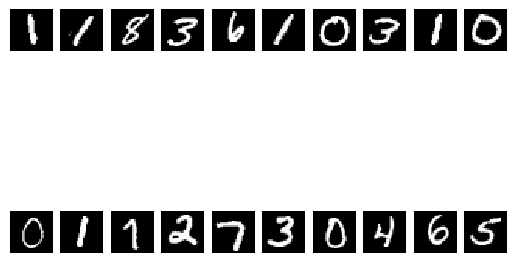

In [11]:
import matplotlib.pyplot as plt
figure = plt.figure()
for i in range(200,220,1):
  figure.add_subplot(2,10,(i-200)+1)
  plt.imshow(x_train[i], cmap='gray', vmin=0, vmax=1, interpolation='nearest')
  plt.axis('off')
plt.show()

In [12]:
x_train[11:11].shape
predictions = model.predict(x_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 797us/step


In [13]:
len(predictions)

60000

In [14]:
[f"{i} -> {x:.2f}" for i,x in enumerate(predictions[11])]
#predictions[11].map(lambda x: f"{x:.2f}")

['0 -> 0.00',
 '1 -> 0.00',
 '2 -> 0.00',
 '3 -> 0.00',
 '4 -> 0.00',
 '5 -> 1.00',
 '6 -> 0.00',
 '7 -> 0.00',
 '8 -> 0.00',
 '9 -> 0.00']